In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 피벗테이블
- 정의 : 두개의 키를 사용해서 데이터를 선택하는 방법
    - 자료의 형태를 변경하기 위해 많이 사용하는 방법

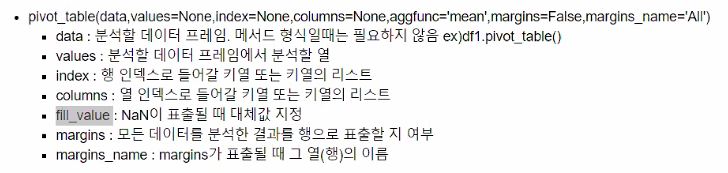

In [3]:
# 사용 외부 데이터 가져오기
# 경로설정이 중요
# 현재 주피터 파일
# D:/DataScience/source_code/
# data
# D:/DataScience/data/02. sales-funnel.xlsx : 절대경로
# 상대경로 : 현재 작업중인위치에서 얼마나 떨어져 있는지는 포현 (사용기호 ../ -> 현재 위치부터 하나 위 디렉터리./ - > 현재디렉터리)
# 예시
# 현재 위치 : D:/DataScience/source_code -> ../ (datascience) ../../ (D:\) .. /abc (datascience\abc) ../data (datascience\data)
# 경로 : ../data/02. sales-funnel.xlsx

# pandas에서 엑셀 데이터 읽어오기
# pd.read_exel(경로를 포함한 파일명)
df = pd.read_excel('../data/02. sales-funnel.xlsx')
# 데이터 프레임의 행, 열수 확인
df.shape
df.head() # df의 앞 5줄 출력
df.tail() # df의 뒤 5줄 출력

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


,Account,Name,Rep,Manager,Product,Quantity,Price,Status
12,239344,Stokes LLC,Cedric Moss,Fred Anderson,Software,1,10000,presented
13,307599,"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,Maintenance,3,7000,won
14,688981,Keeling LLC,Wendy Yule,Fred Anderson,CPU,5,100000,won
15,729833,Koepp Ltd,Wendy Yule,Fred Anderson,CPU,2,65000,declined
16,729833,Koepp Ltd,Wendy Yule,Fred Anderson,Monitor,2,5000,presented


In [11]:
# 피벗 테이블 생성할 때 반드시 설정해야 하는 인수
# data : 사용데이터 프레임
# index : 행 인덱스로 사용할필드(기준필드로 설정)
# 기본 : 평균함수(mean) - 각 데이터 그룹의 평균값이 반환
# 행 인덱스만 지정한 경우 나머지 필드 중 수치데이터가 저장된 필드만 출력이 됨 

# df 데이터 프레임을 이용해서 name 기준으로 한 피벗테이블을 생성
pd.pivot_table(df, index=['Name'])
TB = df[df['Name'] == 'Trantow-Barrows']

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [12]:
# 여러개의 인덱스 지정(멀티 인덱스를 사용하게 된다)
pd.pivot_table(df, index=['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [14]:
pd.pivot_table(df, index=['Manager', 'Rep'],values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [15]:
# 특정 필드만 추출하고 계산 함수 변경 (aggfunc = )
pd.pivot_table(df, index=['Manager','Rep'], values = ['Price'], aggfunc= np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [17]:
# 특정필드 추출하고 계산함수 변경 - 총 가격합계와 건수 계산
pd.pivot_table(df, index= ['Manager', 'Rep'], values = ['Price'], aggfunc=[np.sum, len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [19]:
# Manager, Rep를 기준으로 각 품목별 가격의 합계를 확인
# 피벗 테이블로 작성
# value의 그룹화 인수 - columns 사용
pd.pivot_table(df, index=['Manager', 'Rep'], values = ['Price'],columns= ['Product'], aggfunc=[np.sum])


sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [20]:
# Manager, Rep를 기준으로 각 품목별 가격의 합계를 확인
# 피벗 테이블로 작성
# value의 그룹화 인수 - columns 사용
# NaN 값을 0으로 변경 인수 : fill_value = 0 
pd.pivot_table(df, index=['Manager', 'Rep'], values = ['Price'],columns= ['Product'], aggfunc=[np.sum],fill_value = 0 )


sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [23]:
# 계산된 피봇테이블에 각 value별 총 합계를 구하는 행과 열을 추가하시오.
# 각 Manager별 Rep을 가격으로 잡고
# 품목과 수량과 가격의 합계를 표시하시오.
# 단, NaN 값을 0으로 처리한다.
pd.pivot_table(df, index=['Manager', 'Rep'], values = ['Price', 'Quantity'],
               columns= ['Product'], aggfunc=[np.sum],fill_value = 0 ,
              margins= True, margins_name='Total')



sum                                       \
                              Price                                        
Product                         CPU Maintenance Monitor Software   Total   
Manager       Rep                                                          
Debra Henley  Craig Booker    65000        5000       0    10000   80000   
              Daniel Hilton  105000           0       0    10000  115000   
              John Smith      35000        5000       0        0   40000   
Fred Anderson Cedric Moss     95000        5000       0    10000  110000   
              Wendy Yule     165000        7000    5000        0  177000   
Total                        465000       22000    5000    30000  522000   

                                                                         
                            Quantity                                     
Product                          CPU Maintenance Monitor Software Total  
Manager       Rep                                                        
Debra Henley  Craig Booker         2           2       0        1     5  
              Daniel Hilton        4           0       0        1     5  
              John Smith           1           2       0        0     3  
Fred Anderson Cedric Moss          3           1       0        1     5  
              Wendy Yule           7           3       2        0    12  
Total                             17           8       2        3    30